<a href="https://colab.research.google.com/github/tdavila28/Coursera_capstone_project/blob/main/Preprocessing_Cauca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lectura y procesamiento de archivos Argelia_Cauca

#Librerias e instalación de herramientas

In [ ]:
!pip install geopandas


In [ ]:
import osgeo
import geopandas as gp
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Carga y lectura de Shapes

In [ ]:
buffer25m=gp.read_file("/content/drive/MyDrive/Argelia/Argelia_buffer_25m.shp")
paramos=gp.read_file("/content/drive/MyDrive/Argelia/Amb_Paramos_Arg.shp")

In [ ]:
Amb_humedal=gp.read_file("/content/drive/MyDrive/Argelia/Amb_Humedales_Arg.shp")
Amb_RAMSAR=gp.read_file("/content/drive/MyDrive/Argelia/Amb_Humedal_RAMSAR_Arg.shp")
Amb_RUNAP=gp.read_file("/content/drive/MyDrive/Argelia/Amb_RUNAP_Arg.shp")
Amb_reservas_ley2=gp.read_file("/content/drive/MyDrive/Argelia/Reservas_ley_2da_Arg.shp")


In [ ]:
Via=gp.read_file("/content/drive/MyDrive/Argelia/via_Argelia.shp")
Drenaje_sencillo=gp.read_file("/content/drive/MyDrive/Argelia/Drenaje_sencillo_Arg.shp")
Drenaje_doble=gp.read_file("/content/drive/MyDrive/Argelia/drenaje_doble_Arg.shp")

In [ ]:
Cobertura_2018=gp.read_file("/content/drive/MyDrive/Argelia/coberturas_2018_Arg.shp")
Cobertura_2010_2012=gp.read_file("/content/drive/MyDrive/Argelia/cobertura_2010-2012_Arg.shp")
Cobertura_2005_2009=gp.read_file("/content/drive/MyDrive/Argelia/cobertura_2005_2009_Arg.shp")
Cobertura_2000_2002=gp.read_file("/content/drive/MyDrive/Argelia/cobertura_2000_2002_Arg.shp")


In [ ]:
Zona_Reserva_Campesina=gp.read_file("/content/drive/MyDrive/Argelia/zona_reserva_campesina_Argelia.shp")
Comunidades_negras=gp.read_file("/content/drive/MyDrive/Argelia/comunidades_negras_Arg.shp")
Resguardo_Indigena_=gp.read_file("/content/drive/MyDrive/Argelia/resguardos_legalizados_Arg.shp")
centro_poblado_mascabeceras=gp.read_file("/content/drive/MyDrive/Argelia/cent_Pob_mas_cabeceras_Arg.shp")

In [ ]:
paramos.head()

,Id,Nombre,Escala,Acto_Admin,Fecha_Acto,No_Poligon,Fuente,Area_Ha,Fecha_Ingr,Fecha_Reco,Shape_Leng,Shape_Le_1,Shape_Area,geometry
0,PD_034,Cerro Plateado,100.000,ResoluciÃ³n No. 1503 de 6 de Agosto de 2018,2018-08-06,0.0,Minambiente,943.487640,2020-07-22,2020-06-30,0.268966,29868.933022,9.442241e+06,"POLYGON ((4538999.029 1820813.992, 4538998.931..."
1,PD_034,Cerro Plateado,100.000,ResoluciÃ³n No. 1503 de 6 de Agosto de 2018,2018-08-06,0.0,Minambiente,16126.849888,2020-07-22,2020-06-30,2.223711,247144.647561,1.614172e+08,"MULTIPOLYGON (((4519856.163 1800139.812, 45198..."


In [ ]:
paramos.columns

Index(['Id', 'Nombre', 'Escala', 'Acto_Admin', 'Fecha_Acto', 'No_Poligon',
       'Fuente', 'Area_Ha', 'Fecha_Ingr', 'Fecha_Reco', 'Shape_Leng',
       'Shape_Le_1', 'Shape_Area', 'geometry'],
      dtype='object')

In [ ]:
paramos.shape

(2, 14)

In [ ]:
paramos.describe()

,No_Poligon,Area_Ha,Shape_Leng,Shape_Le_1,Shape_Area
count,2.0,2.000000,2.000000,2.000000,2.000000e+00
mean,0.0,8535.168764,1.246338,138506.790292,8.542972e+07
std,0.0,10736.258407,1.382214,153637.131137,1.074625e+08
min,0.0,943.487640,0.268966,29868.933022,9.442241e+06
25%,0.0,4739.328202,0.757652,84187.861657,4.743598e+07
50%,0.0,8535.168764,1.246338,138506.790292,8.542972e+07
75%,0.0,12331.009326,1.735025,192825.718926,1.234235e+08
max,0.0,16126.849888,2.223711,247144.647561,1.614172e+08


In [ ]:
paramos.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Id          2 non-null      object  
 1   Nombre      2 non-null      object  
 2   Escala      2 non-null      object  
 3   Acto_Admin  2 non-null      object  
 4   Fecha_Acto  2 non-null      object  
 5   No_Poligon  2 non-null      float64 
 6   Fuente      2 non-null      object  
 7   Area_Ha     2 non-null      float64 
 8   Fecha_Ingr  2 non-null      object  
 9   Fecha_Reco  2 non-null      object  
 10  Shape_Leng  2 non-null      float64 
 11  Shape_Le_1  2 non-null      float64 
 12  Shape_Area  2 non-null      float64 
 13  geometry    2 non-null      geometry
dtypes: float64(5), geometry(1), object(8)
memory usage: 352.0+ bytes


In [ ]:
paramos.isna().sum()

Id            0
Nombre        0
Escala        0
Acto_Admin    0
Fecha_Acto    0
No_Poligon    0
Fuente        0
Area_Ha       0
Fecha_Ingr    0
Fecha_Reco    0
Shape_Leng    0
Shape_Le_1    0
Shape_Area    0
geometry      0
dtype: int64

#Clip de todas las capas nacionales de acuerdo al buffer del municipio 

In [ ]:
from geopandas import GeoSeries

In [ ]:
import folium

In [ ]:
distance=25

In [ ]:
paramos.buffer(0.2)

0    POLYGON ((4538999.229 1820813.990, 4538999.229...
1    MULTIPOLYGON (((4519856.009 1800139.941, 45198...
dtype: geometry

In [ ]:
paramos_argelia=gp.clip(paramos,buffer25m)
paramos_argelia.shape

(2, 14)

In [ ]:
paramos_argelia.columns

Index(['Id', 'Nombre', 'Escala', 'Acto_Admin', 'Fecha_Acto', 'No_Poligon',
       'Fuente', 'Area_Ha', 'Fecha_Ingr', 'Fecha_Reco', 'Shape_Leng',
       'Shape_Le_1', 'Shape_Area', 'geometry'],
      dtype='object')

In [ ]:
paramos_argelia.set_crs(epsg=9377,inplace=True)

,geometry
1,"MULTIPOLYGON (((4519868.601 1800157.572, 45198..."
0,"POLYGON ((4538998.931 1820812.044, 4538987.559..."


Plots

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
paramos_argelia.columns

Index(['Id', 'Nombre', 'Escala', 'Acto_Admin', 'Fecha_Acto', 'No_Poligon',
       'Fuente', 'Area_Ha', 'Fecha_Ingr', 'Fecha_Reco', 'Shape_Leng',
       'Shape_Le_1', 'Shape_Area', 'geometry'],
      dtype='object')

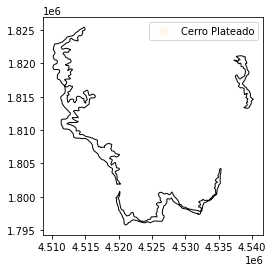

In [ ]:
fig,ax=plt.subplots(1,1)
paramos_argelia.plot(column='Nombre',ax=ax,legend=True, cmap='OrRd',facecolor="none", edgecolor="black");

Plotting multiple layers

/usr/local/lib/python3.9/dist-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


<Axes: >

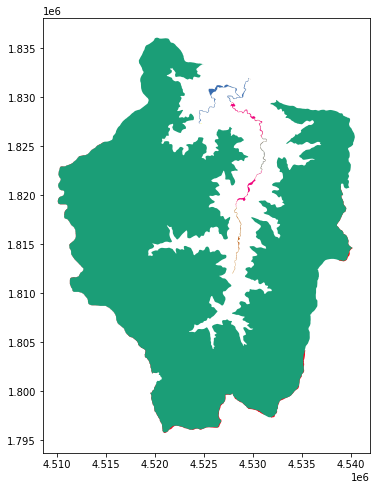

In [ ]:
fig,ax=plt.subplots(figsize=(10,8))
paramos.plot(ax=ax,cmap='hsv')
Amb_humedal.plot(ax=ax,cmap='Accent',label='humedal')
Amb_RAMSAR.plot(ax=ax,cmap='black')
Amb_RUNAP.plot(ax=ax,cmap='Greens')
Amb_reservas_ley2.plot(ax=ax,cmap='Dark2')

Exportar a maquina el corte de todos los shapes por municipio 

In [ ]:
#paramos_argelia.to_file('C:\Users\tdavi\OneDrive\Documents\proyecto_Automata_Cauca\Insumos_shape_cortes_Cauca\vectores_zonas_estudio_origen_nacional\Argelia\paramos_argelia.shp')

#Lectura y descarga de Raster

In [ ]:
from osgeo import gdal,ogr,osr

In [ ]:
Argelia_Mask=gdal.Open("/content/drive/MyDrive/Argelia/Argelia_mask.geotiff")

In [ ]:
print(Argelia_Mask)

None


#Transformación formato shape/tif

In [ ]:
ensayo=gdal_rasterize(1 -burn paramos_argelia.shp paramos_argelia.tif)
#(Output, [1],paramos_argelia, options = ['ATTRIBUTE=Id'])

SyntaxError: ignored

#Calculo de distancias (Euclidiana/Geodesic)